In [1]:
#%matplotlib notebook
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

from scipy.stats import norm
from scipy.stats import t
from scipy.stats import chi2

import os
import os.path as path
import wget

In [2]:
if not path.exists('Data'):
    os.mkdir('Data')
    
!rm Data/*

file = 'Data/Minimos.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosLineal.txt'
#url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/MinimosCuadratico.txt'

if not path.exists(file):
    Path_ = wget.download(url,file)
    print('File loaded')
else:
    Path_ = file

rm: no se puede borrar 'Data/*': No existe el archivo o el directorio
100% [..................................................................................] 522 / 522File loaded


In [3]:
data = np.loadtxt(Path_)
x = data[:,0]
y = data[:,1]

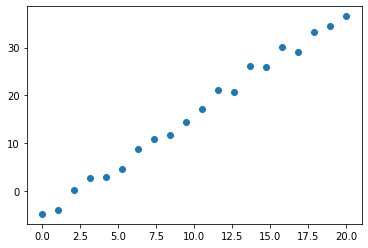

In [6]:
plt.scatter(x,y)

In [13]:
def GetFit(x,y,n=1):
    
    l = x.shape[0]
    b = y
    
    A = np.ones((l,n+1))
    
    for i in range(1,n+1):
        A[:,i] = x**i
        
    AT = np.dot(A.T,A)
    bT = np.dot(A.T,b)

    xsol = np.linalg.solve(AT,bT)
    
    return xsol

In [44]:
n = 2
param = GetFit(x,y,n)
param

array([-5.45282232e+00,  2.22752179e+00, -5.12424875e-03])

In [45]:
def GetModel(x,p):
    
    y = 0.
    for i in range(len(p)):
        y += p[i]*x**i
        
    return y

In [46]:
X = sym.Symbol('x',real=True)
GetModel(X,param)

-0.00512424874937888*x**2 + 2.22752178860942*x - 5.45282232464362

In [47]:
_x = np.linspace(np.min(x),np.max(x),50)
_y = GetModel(_x,param)

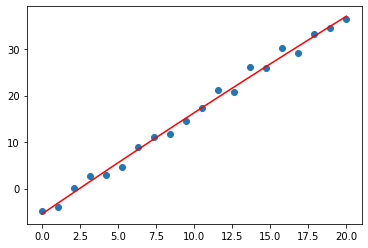

In [48]:
plt.scatter(x,y)
plt.plot(_x,_y,color='r')

In [49]:
2

2